# Example 30 - Planar Dipping Layers

This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 1157 m wide (W-E extent) and 1361 m high (N-S extent). The vertical model extents varies between 0 m and 600 m. The model represents two planar stratigraphic units (blue and red) dipping towards the northeast above an unspecified basement (yellow). The map has been georeferenced with QGIS. The stratigraphic boundaries were digitized in QGIS. Strikes lines were digitized in QGIS as well and were used to calculate orientations for the `GemPy` model. These will be loaded into the model directly. The contour lines were also digitized and will be interpolated with `GemGIS` to create a topography for the model. 

Map Source: Unknown

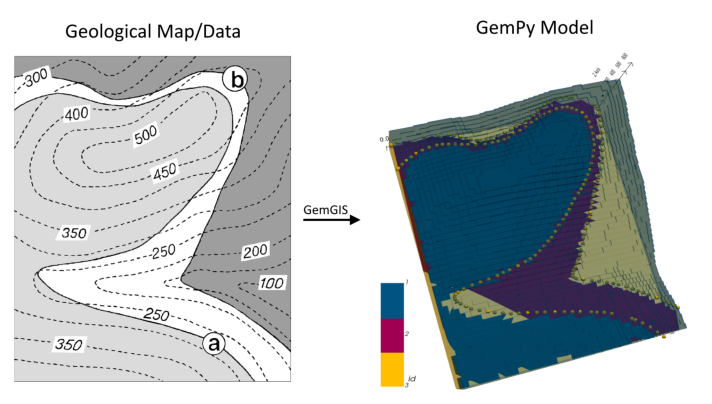

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/cover_example30.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

## Licensing

Computational Geosciences and Reservoir Engineering, RWTH Aachen University, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)rwth-aachen.de


This work is licensed under a Creative Commons Attribution 4.0 International License (http://creativecommons.org/licenses/by/4.0/)

## Import GemGIS

If you have installed ``GemGIS`` via pip or conda, you can import ``GemGIS`` like any other package. If you have downloaded the repository, append the path to the directory where the ``GemGIS`` repository is stored and then import ``GemGIS``. 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg

## Importing Libraries and loading Data

All remaining packages can be loaded in order to prepare the data and to construct the model. The example data is downloaded from an external server using `pooch`. It will be stored in a data folder in the same directory where this notebook is stored.  

In [3]:
import geopandas as gpd
import rasterio

In [4]:
file_path = 'data/example30/'
gg.download_gemgis_data.download_tutorial_data(filename="example30_planar_dipping_layers.zip", dirpath=file_path)

## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating contour lines digitized from the georeferenced map using the `SciPy` Radial Basis Function interpolation wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 

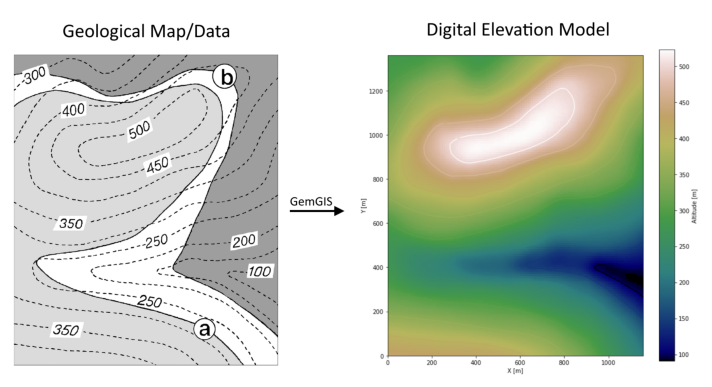

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../images/dem_example30.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [6]:
topo = gpd.read_file(file_path + 'topo30.shp')
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (4.295 91.552, 43.424 86.924, 83.39..."
1,None,350,"LINESTRING (3.874 182.012, 64.462 176.122, 125..."
2,None,300,"LINESTRING (4.716 300.242, 37.534 286.357, 86...."
3,None,100,"LINESTRING (1156.295 265.320, 1138.203 282.570..."
4,None,300,"LINESTRING (1.771 1206.526, 24.912 1231.771, 4..."


### Interpolating the contour lines

In [7]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)

### Plotting the raster

(0.0, 1361.0)

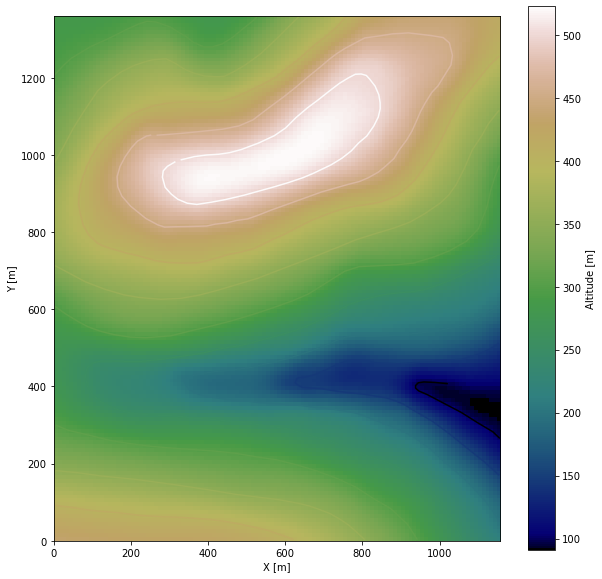

In [8]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 1157, 0, 1361], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1157)
plt.ylim(0, 1361)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [9]:
topo_raster = rasterio.open(file_path + 'raster30.tif')

## Interface Points of stratigraphic boundaries

The interface points will be extracted from LineStrings digitized from the georeferenced map using QGIS. It is important to provide a formation name for each layer boundary. The vertical position of the interface point will be extracted from the digital elevation model using the `GemGIS` function `gg.vector.extract_xyz()`. The resulting GeoDataFrame now contains single points including the information about the respective formation. 

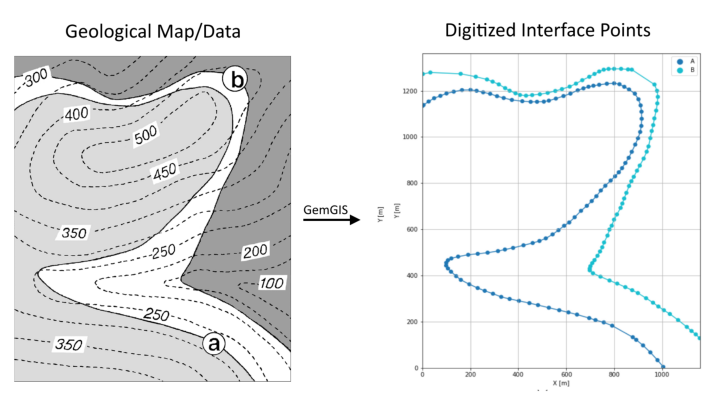

In [10]:
img = mpimg.imread('../images/interfaces_example30.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [11]:
interfaces = gpd.read_file(file_path + 'interfaces30.shp')
interfaces.head()

,id,formation,geometry
0,None,A,"LINESTRING (1003.775 4.248, 979.792 33.489, 94..."
1,None,B,"LINESTRING (2.612 1272.583, 33.747 1279.105, 1..."


### Extracting Z coordinate from Digital Elevation Model

In [12]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin(['A', 'B'])]
interfaces_coords

,formation,geometry,X,Y,Z
0,A,POINT (1003.775 4.248),1003.77,4.25,274.58
1,A,POINT (979.792 33.489),979.79,33.49,276.06
2,A,POINT (949.919 67.149),949.92,67.15,280.72
3,A,POINT (919.626 97.232),919.63,97.23,282.11
4,A,POINT (891.226 121.425),891.23,121.43,279.32
...,...,...,...,...,...
178,B,POINT (1065.624 207.047),1065.62,207.05,178.74
179,B,POINT (1102.019 177.174),1102.02,177.17,176.01
180,B,POINT (1121.373 159.713),1121.37,159.71,175.79
181,B,POINT (1139.255 144.987),1139.25,144.99,170.98


### Plotting the Interface Points

(0.0, 1361.0)

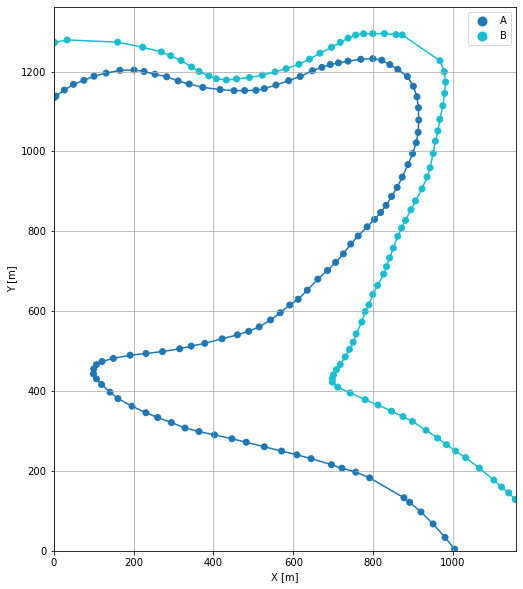

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1157)
plt.ylim(0, 1361)

## Orientations from Strike Lines

Strike lines connect outcropping stratigraphic boundaries (interfaces) of the same altitude. In other words: the intersections between topographic contours and stratigraphic boundaries at the surface. The height difference and the horizontal difference between two digitized lines is used to calculate the dip and azimuth and hence an orientation that is necessary for `GemPy`. In order to calculate the orientations, each set of strikes lines/LineStrings for one formation must be given an id number next to the altitude of the strike line. The id field is already predefined in QGIS. The strike line with the lowest altitude gets the id number `1`, the strike line with the highest altitude the the number according to the number of digitized strike lines. It is currently recommended to use one set of strike lines for each structural element of one formation as illustrated. 


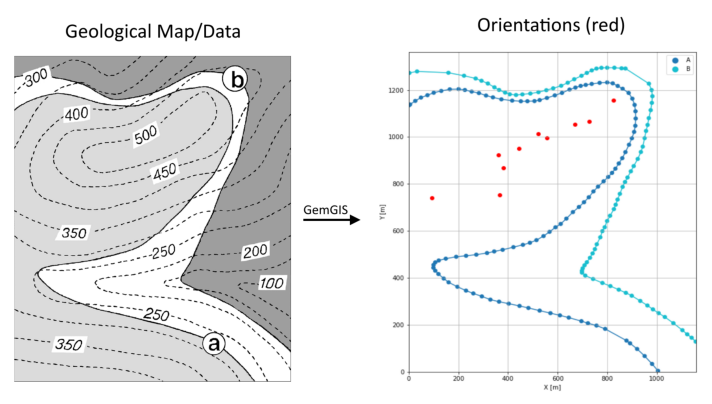

In [14]:
img = mpimg.imread('../images/orientations_example30.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [15]:
strikes = gpd.read_file(file_path + 'strikes30.shp')
strikes

,id,formation,Z,geometry
0,5,A,450,"LINESTRING (672.648 1212.207, 908.266 1026.237)"
1,4,A,400,"LINESTRING (488.362 1152.461, 840.105 873.928)"
2,3,A,350,"LINESTRING (155.132 1200.426, 738.285 759.485)"
3,7,B,450,"LINESTRING (981.475 1168.449, 790.457 1296.356)"
4,6,B,400,"LINESTRING (936.876 944.613, 586.816 1212.207)"
5,5,B,350,"LINESTRING (872.923 809.133, 275.465 1250.915)"
6,4,B,300,"LINESTRING (837.581 713.203, 103.801 1281.209)"
7,2,A,300,"LINESTRING (595.231 618.115, -48.508 1111.228)"
8,1,A,250,"LINESTRING (104.643 462.439, -276.552 771.266)"
9,3,B,250,"LINESTRING (790.457 620.639, 47.421 1186.120)"


### Calculating Orientations for each formation

In [16]:
orientations_a = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'A'].sort_values(by='id', ascending=True).reset_index())
orientations_a

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,6.98,217.87,275.00,POINT (93.703 740.762),1.00,A,93.70,740.76
1,14.41,217.29,325.00,POINT (360.035 922.313),1.00,A,360.03,922.31
2,18.11,217.45,375.00,POINT (555.471 996.575),1.00,A,555.47,996.57
3,17.23,218.35,425.00,POINT (727.345 1066.208),1.00,A,727.35,1066.21


In [17]:
orientations_b = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'B'].sort_values(by='id', ascending=True).reset_index())
orientations_b

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,26.95,217.47,175.00,POINT (366.977 752.753),1.00,B,366.98,752.75
1,26.47,217.30,225.00,POINT (382.124 868.037),1.00,B,382.12,868.04
2,26.07,217.51,275.00,POINT (444.815 950.293),1.00,B,444.82,950.29
3,31.65,217.25,325.00,POINT (522.443 1013.615),1.00,B,522.44,1013.61
4,18.79,216.72,375.00,POINT (668.020 1054.217),1.00,B,668.02,1054.22
5,14.70,216.63,425.00,POINT (823.906 1155.406),1.00,B,823.91,1155.41


### Merging Orientations

In [18]:
import pandas as pd
orientations = pd.concat([orientations_a, orientations_b])
orientations = orientations[orientations['formation'].isin(['A', 'B'])].reset_index()
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,6.98,217.87,275.00,POINT (93.703 740.762),1.00,A,93.70,740.76
1,1,14.41,217.29,325.00,POINT (360.035 922.313),1.00,A,360.03,922.31
2,2,18.11,217.45,375.00,POINT (555.471 996.575),1.00,A,555.47,996.57
3,3,17.23,218.35,425.00,POINT (727.345 1066.208),1.00,A,727.35,1066.21
4,0,26.95,217.47,175.00,POINT (366.977 752.753),1.00,B,366.98,752.75
5,1,26.47,217.30,225.00,POINT (382.124 868.037),1.00,B,382.12,868.04
6,2,26.07,217.51,275.00,POINT (444.815 950.293),1.00,B,444.82,950.29
7,3,31.65,217.25,325.00,POINT (522.443 1013.615),1.00,B,522.44,1013.61
8,4,18.79,216.72,375.00,POINT (668.020 1054.217),1.00,B,668.02,1054.22
9,5,14.70,216.63,425.00,POINT (823.906 1155.406),1.00,B,823.91,1155.41


### Plotting the Orientations

(0.0, 1361.0)

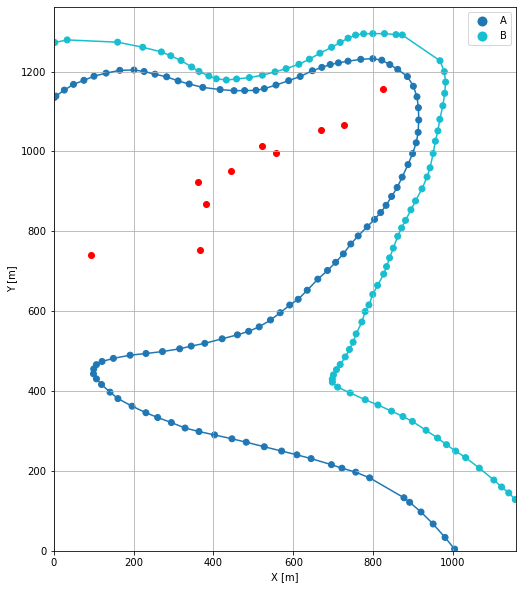

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.xlim(0, 1157)
plt.ylim(0, 1361)

## GemPy Model Construction

The structural geological model will be constructed using the `GemPy` package. 

In [20]:
import gempy as gp

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Creating new Model

In [21]:
geo_model = gp.create_model('Model30')
geo_model

Model30  2022-04-17 08:51

### Initiate Data

In [22]:
gp.init_data(geo_model, [0, 1157, 0, 1361, 0, 600], [50,50,50],
             surface_points_df=interfaces_coords,
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model30  2022-04-17 08:51

### Model Surfaces

In [23]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,A,Default series,1,#015482,1
1,B,Default series,2,#9f0052,2


### Mapping the Stack to Surfaces

In [24]:
gp.map_stack_to_surfaces(geo_model,
                         {'Strata1': ('A'),
                          'Strata2': ('B')
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('C')

,surface,series,order_surfaces,color,id
0,A,Strata1,1,#015482,1
1,B,Strata2,1,#9f0052,2
2,C,Strata2,2,#ffbe00,3


## Adding additional orientations

In [25]:
geo_model.add_orientations(X=1000, Y=1250, Z=500, surface='A', orientation = [217.5,18,1])
geo_model.add_orientations(X=100, Y=200, Z=300, surface='A', orientation = [217.5,7,1])
geo_model.add_orientations(X=400, Y=400, Z=200, surface='A', orientation = [217.5,14.5,1])

geo_model.add_orientations(X=850, Y=300, Z=200, surface='B', orientation = [217.5,26,1])
geo_model.add_orientations(X=1000, Y=100, Z=200, surface='B', orientation = [217.5,26,1])


,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,93.70,740.76,275.00,-0.07,-0.10,0.99,0.01,A
1,360.03,922.31,325.00,-0.15,-0.20,0.97,0.01,A
2,555.47,996.57,375.00,-0.19,-0.25,0.95,0.01,A
3,727.35,1066.21,425.00,-0.18,-0.23,0.96,0.01,A
10,1000.00,1250.00,500.00,-0.19,-0.25,0.95,0.01,A
11,100.00,200.00,300.00,-0.07,-0.10,0.99,0.01,A
12,400.00,400.00,200.00,-0.15,-0.20,0.97,0.01,A
4,366.98,752.75,175.00,-0.28,-0.36,0.89,0.01,B
5,382.12,868.04,225.00,-0.27,-0.35,0.90,0.01,B
6,444.82,950.29,275.00,-0.27,-0.35,0.90,0.01,B


### Showing the Number of Data Points

In [26]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,A,Strata1,1,#015482,1,102,7
1,B,Strata2,1,#9f0052,2,81,8
2,C,Strata2,2,#ffbe00,3,0,0


### Loading Digital Elevation Model

In [27]:
geo_model.set_topography(source='gdal', filepath=file_path + 'raster30.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  11.57      ,   13.61      ,    6.        ],
       [  11.57      ,   13.61      ,   18.        ],
       [  11.57      ,   13.61      ,   30.        ],
       ...,
       [1152.01293103, 1335.98161765,  415.3067627 ],
       [1152.01293103, 1345.98897059,  416.07495117],
       [1152.01293103, 1355.99632353,  416.66900635]])

### Plotting Input Data

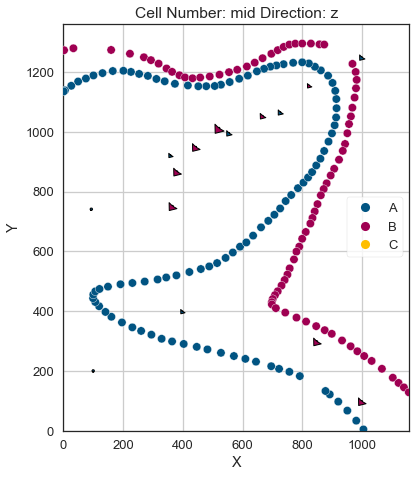

In [28]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

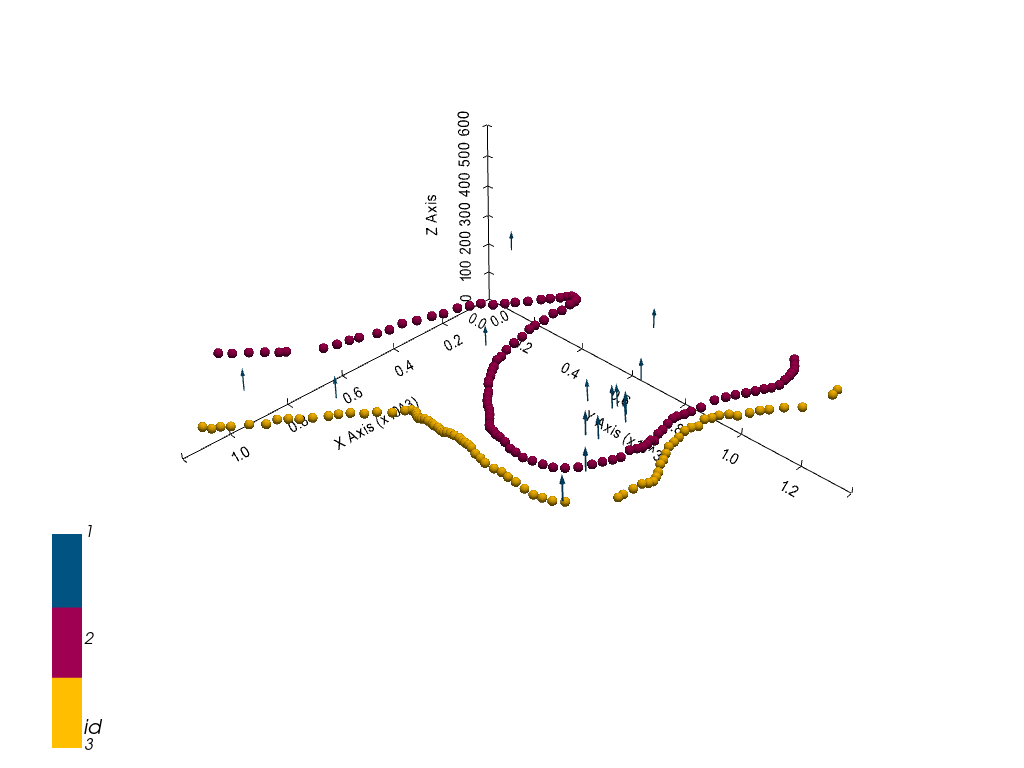

In [29]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

### Setting the Interpolator

In [30]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            1884.4
$C_o$           84546.9
drift equations  [3, 3]


### Computing Model

In [31]:
sol = gp.compute_model(geo_model, compute_mesh=True)

### Plotting Cross Sections

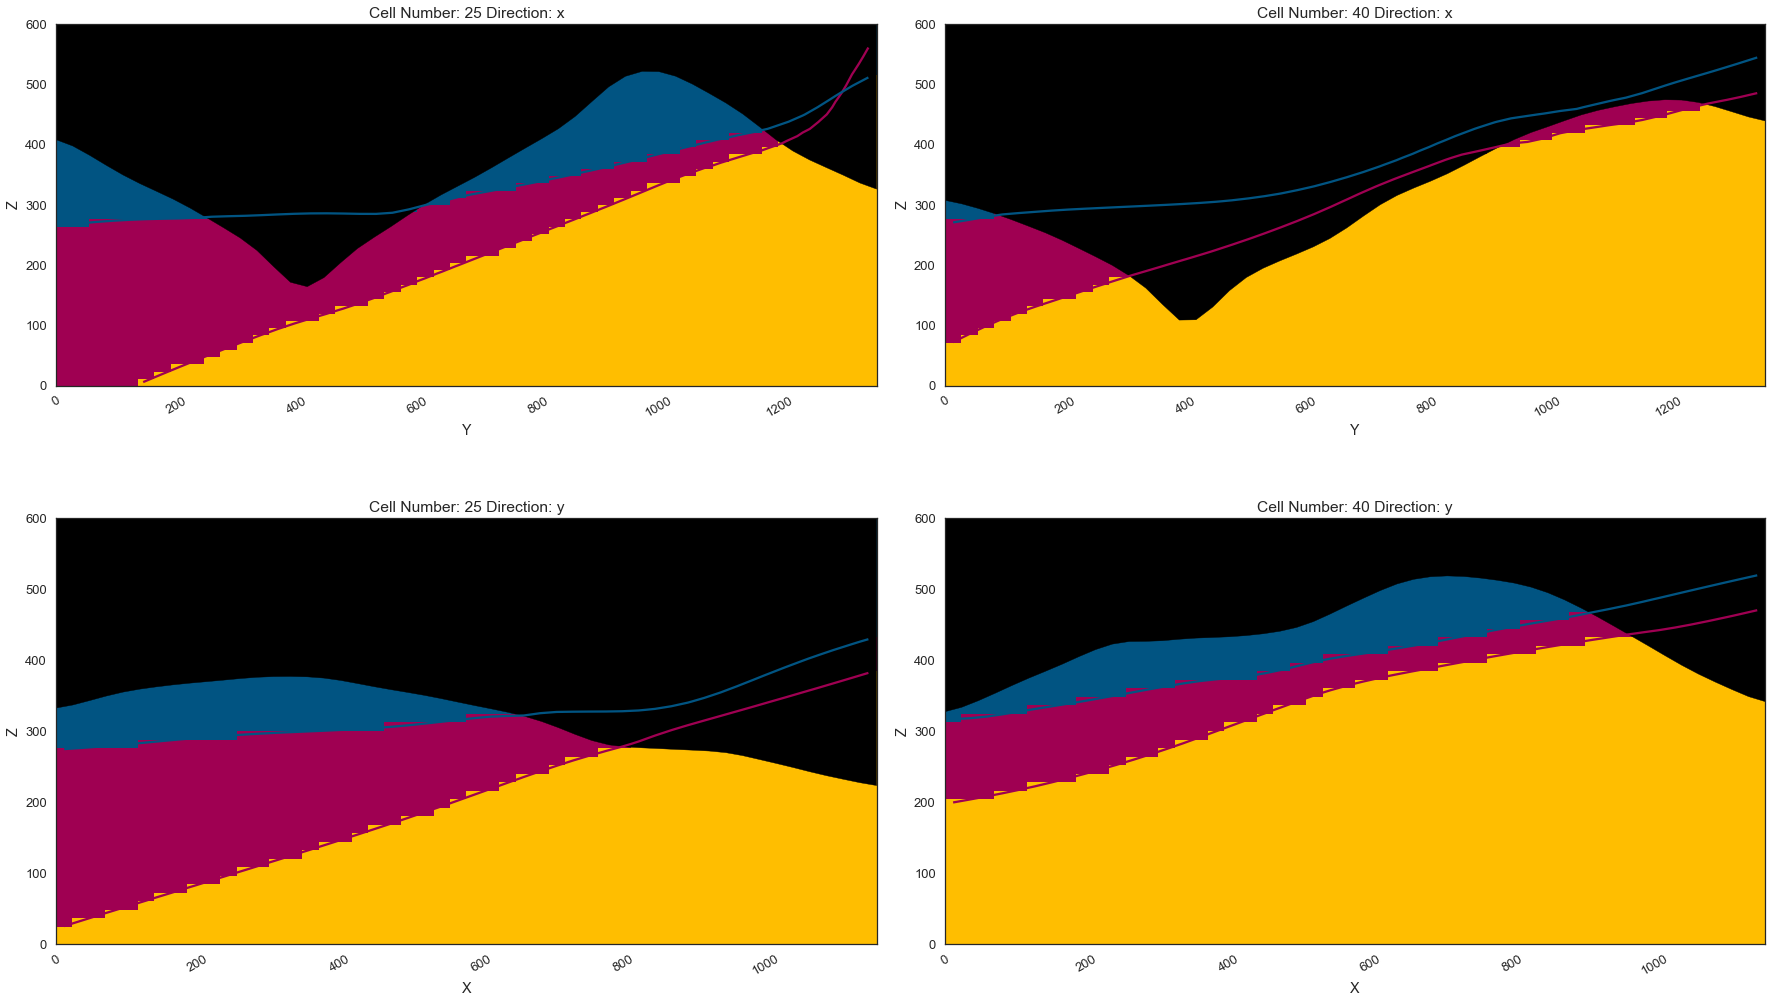

In [32]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 40, 25, 40], show_topography=True, show_data=False)

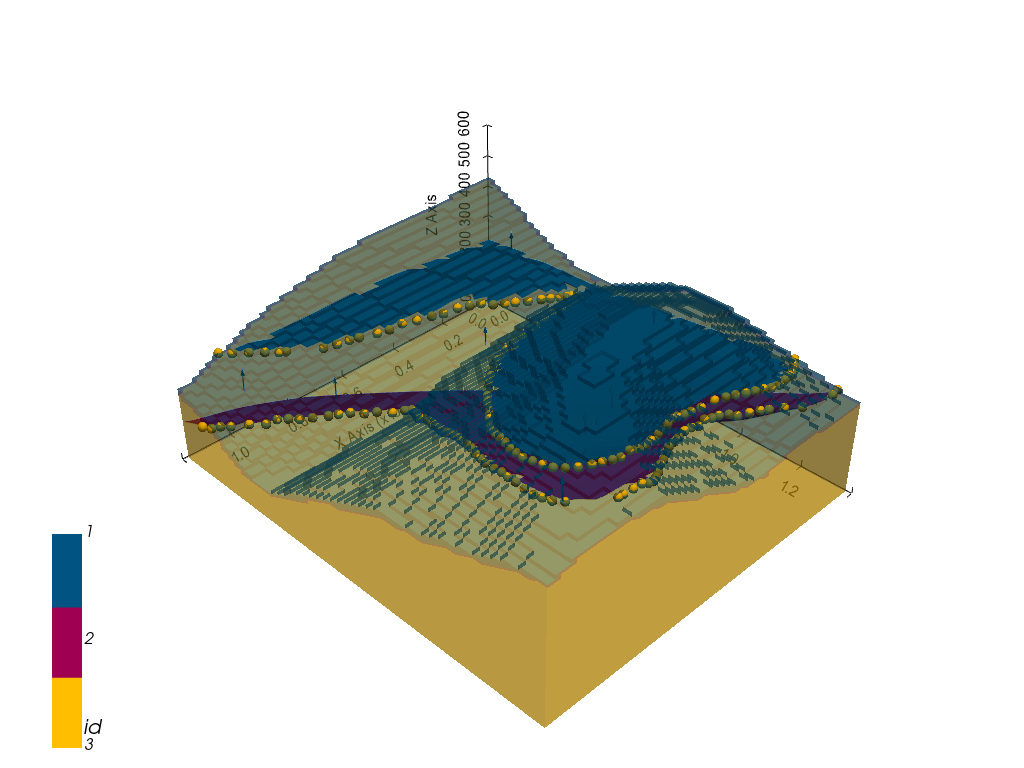

In [33]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=False,
                 plotter_type='basic', notebook=True, show_lith=True)